In [178]:
import pandas as pd
from pandas import Series,DataFrame
import warnings
from copy import deepcopy
import os
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
%matplotlib inline

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(14,10)})

In [3]:
# Loading the data
main = pd.read_csv('Stzwsale1.csv',sep='\t')

# print the shape
print(main.shape)

#runs the first 5 rows so that we can see what kind of data we are working with
main.head()

(1000, 16)


,Unnamed: 0,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total_sales,Date,Payment,Cost,gross margin percentage,Profit,Rating
0,0,750-67-8428,A,Returning,Female,STN,0.75,7,0.26,5.49,1/5/2019,Ewallet,5.23,4.761905,0.26,9.1
1,1,226-31-3081,C,New,Female,STZ,0.15,5,0.04,0.80,3/8/2019,Cash,0.76,4.761905,0.04,9.6
2,2,631-41-3108,A,New,Male,Esslingen_Zeitung,0.46,7,0.16,3.41,3/3/2019,Credit card,3.24,4.761905,0.16,7.4
3,3,123-19-1176,A,Returning,Male,STN,0.58,8,0.23,4.89,1/27/2019,Ewallet,4.66,4.761905,0.23,8.4
4,4,373-73-7910,A,New,Male,Marbacher_Zeitung,0.86,7,0.30,6.34,2/8/2019,Ewallet,6.04,4.761905,0.30,5.3


In [4]:
main.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
main.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total_sales,Date,Payment,Cost,gross margin percentage,Profit,Rating
0,750-67-8428,A,Returning,Female,STN,0.75,7,0.26,5.49,1/5/2019,Ewallet,5.23,4.761905,0.26,9.1
1,226-31-3081,C,New,Female,STZ,0.15,5,0.04,0.80,3/8/2019,Cash,0.76,4.761905,0.04,9.6
2,631-41-3108,A,New,Male,Esslingen_Zeitung,0.46,7,0.16,3.41,3/3/2019,Credit card,3.24,4.761905,0.16,7.4
3,123-19-1176,A,Returning,Male,STN,0.58,8,0.23,4.89,1/27/2019,Ewallet,4.66,4.761905,0.23,8.4
4,373-73-7910,A,New,Male,Marbacher_Zeitung,0.86,7,0.30,6.34,2/8/2019,Ewallet,6.04,4.761905,0.30,5.3


In [6]:
main.describe()

,Unit price,Quantity,Tax 5%,Total_sales,Cost,gross margin percentage,Profit,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,0.556680,5.510000,0.153820,3.229700,3.076000,4.761905e+00,0.153820,6.97270
std,0.265069,2.923431,0.117053,2.458766,2.341816,6.131498e-14,0.117053,1.71858
min,0.100000,1.000000,0.010000,0.110000,0.100000,4.761905e+00,0.010000,4.00000
25%,0.330000,3.000000,0.060000,1.245000,1.185000,4.761905e+00,0.060000,5.50000
50%,0.550000,5.000000,0.120000,2.540000,2.420000,4.761905e+00,0.120000,7.00000
75%,0.780000,8.000000,0.220000,4.712500,4.492500,4.761905e+00,0.220000,8.50000
max,1.000000,10.000000,0.500000,10.430000,9.930000,4.761905e+00,0.500000,10.00000


In [7]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total_sales              1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  Cost                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  Profit                   1000 non-null   float64
 14  Rating                   

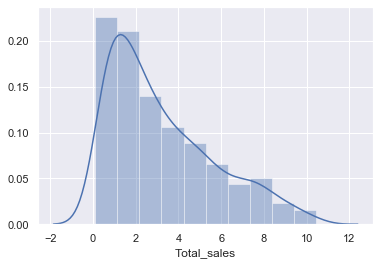

In [9]:
sns.distplot(main.Total_sales, bins = 10)

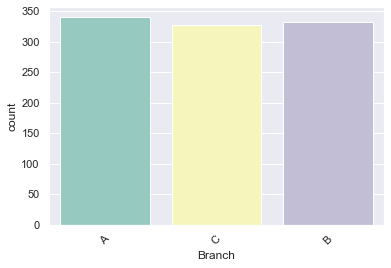

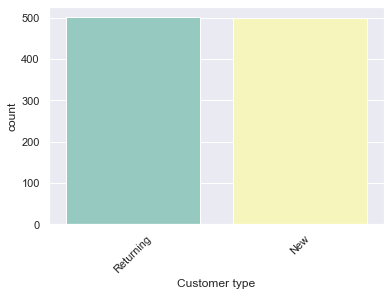

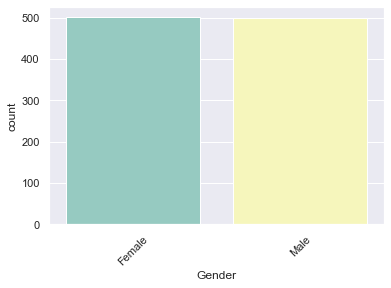

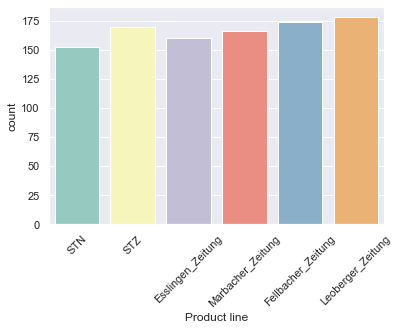

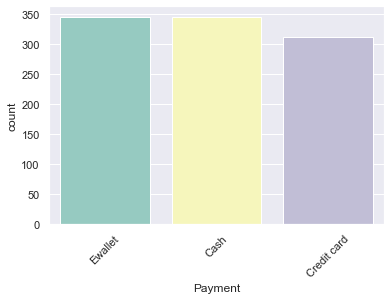

In [10]:
#categorical
more_stat = ['Branch', 'Customer type', 'Gender',
       'Product line', 'Payment']
for p in more_stat:
    sns.countplot(x = p, data = main, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [74]:
# bivariate analysis


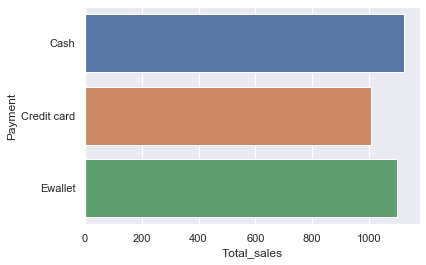

In [73]:
payment = main.pivot_table(index='Payment', values='Total_sales', aggfunc=np.sum).reset_index()
sns.barplot( x="Total_sales", y="Payment",  data=payment)

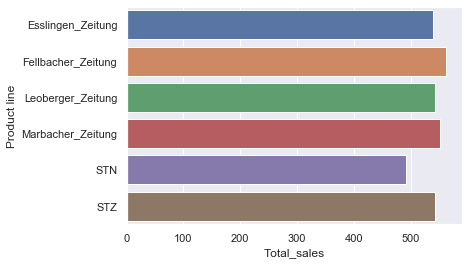

In [64]:
Product = main.pivot_table(index='Product line', values='Total_sales', aggfunc=np.sum).reset_index()
sns.barplot( x="Total_sales", y="Product line",  data=Product)

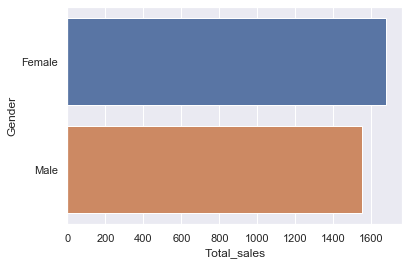

In [82]:
Gender = main.pivot_table(index='Gender', values='Total_sales', aggfunc=np.sum).reset_index()
sns.barplot( x="Total_sales", y="Gender",  data=Gender)

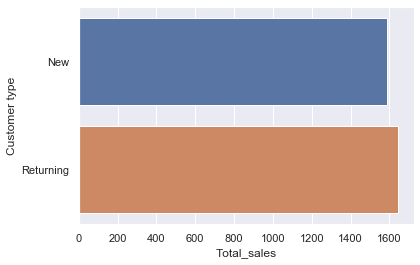

In [77]:
Customertype = main.pivot_table(index='Customer type', values='Total_sales', aggfunc=np.sum).reset_index()
sns.barplot( x="Total_sales", y="Customer type",  data=Customertype)

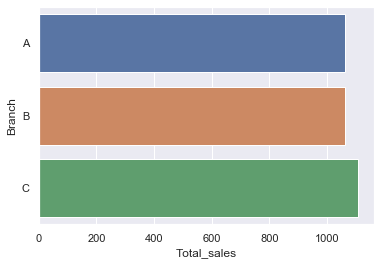

In [80]:
Branch = main.pivot_table(index='Branch', values='Total_sales', aggfunc=np.sum).reset_index()
sns.barplot( x="Total_sales", y="Branch",  data=Branch)

In [ ]:
#continuos variable

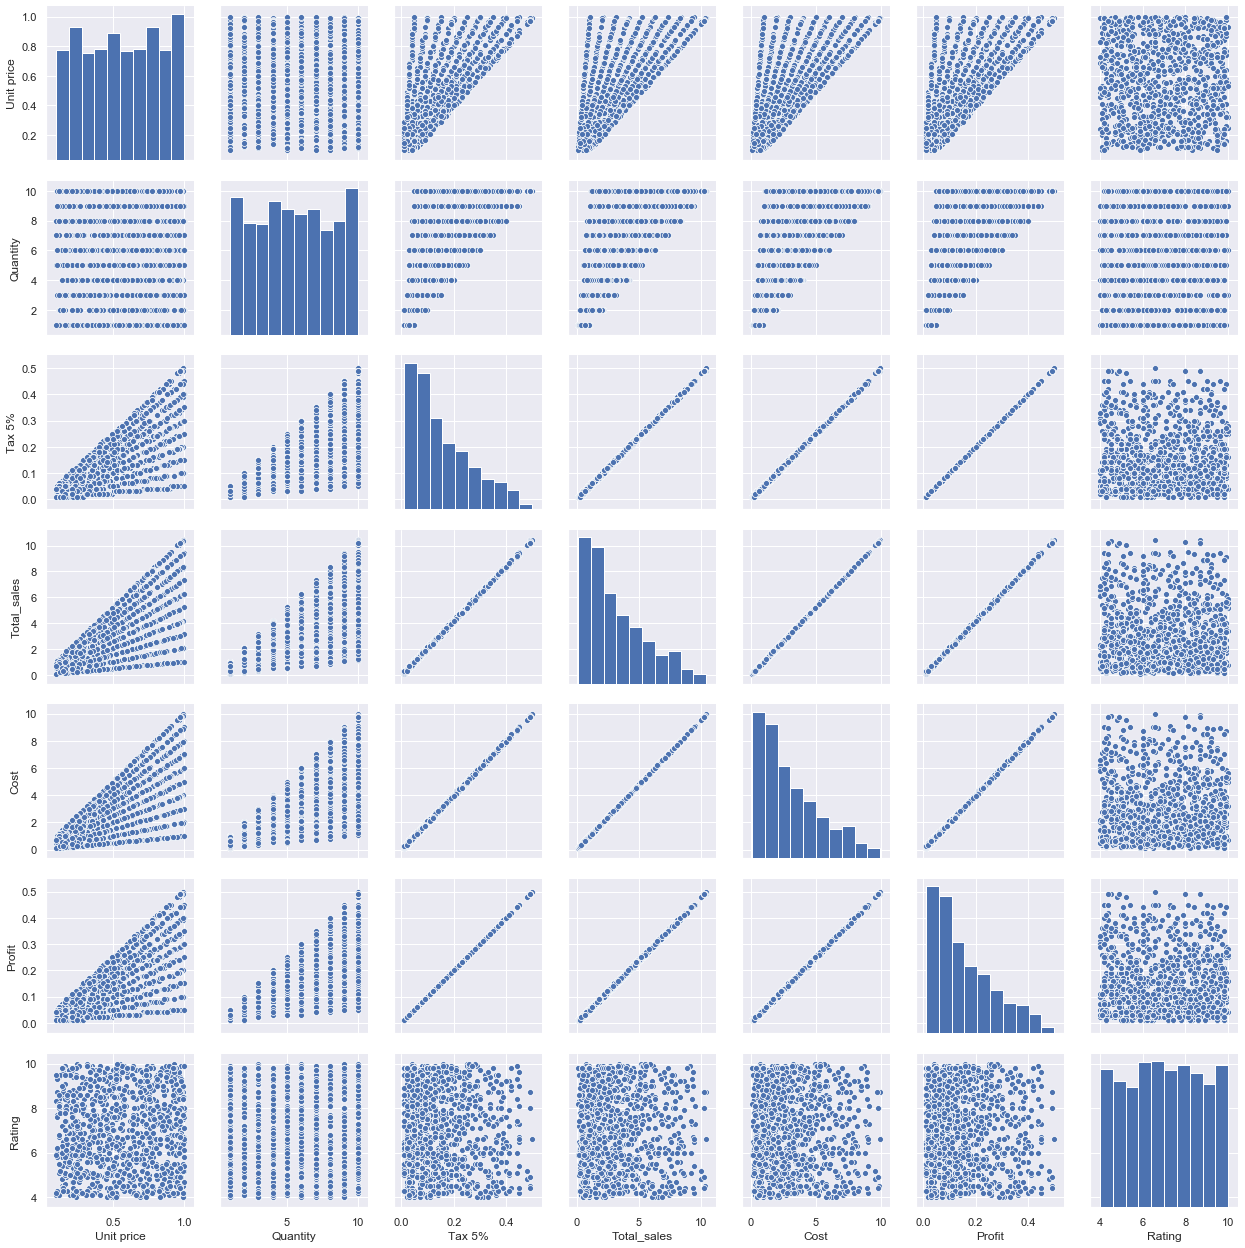

In [118]:
sns.pairplot(main)

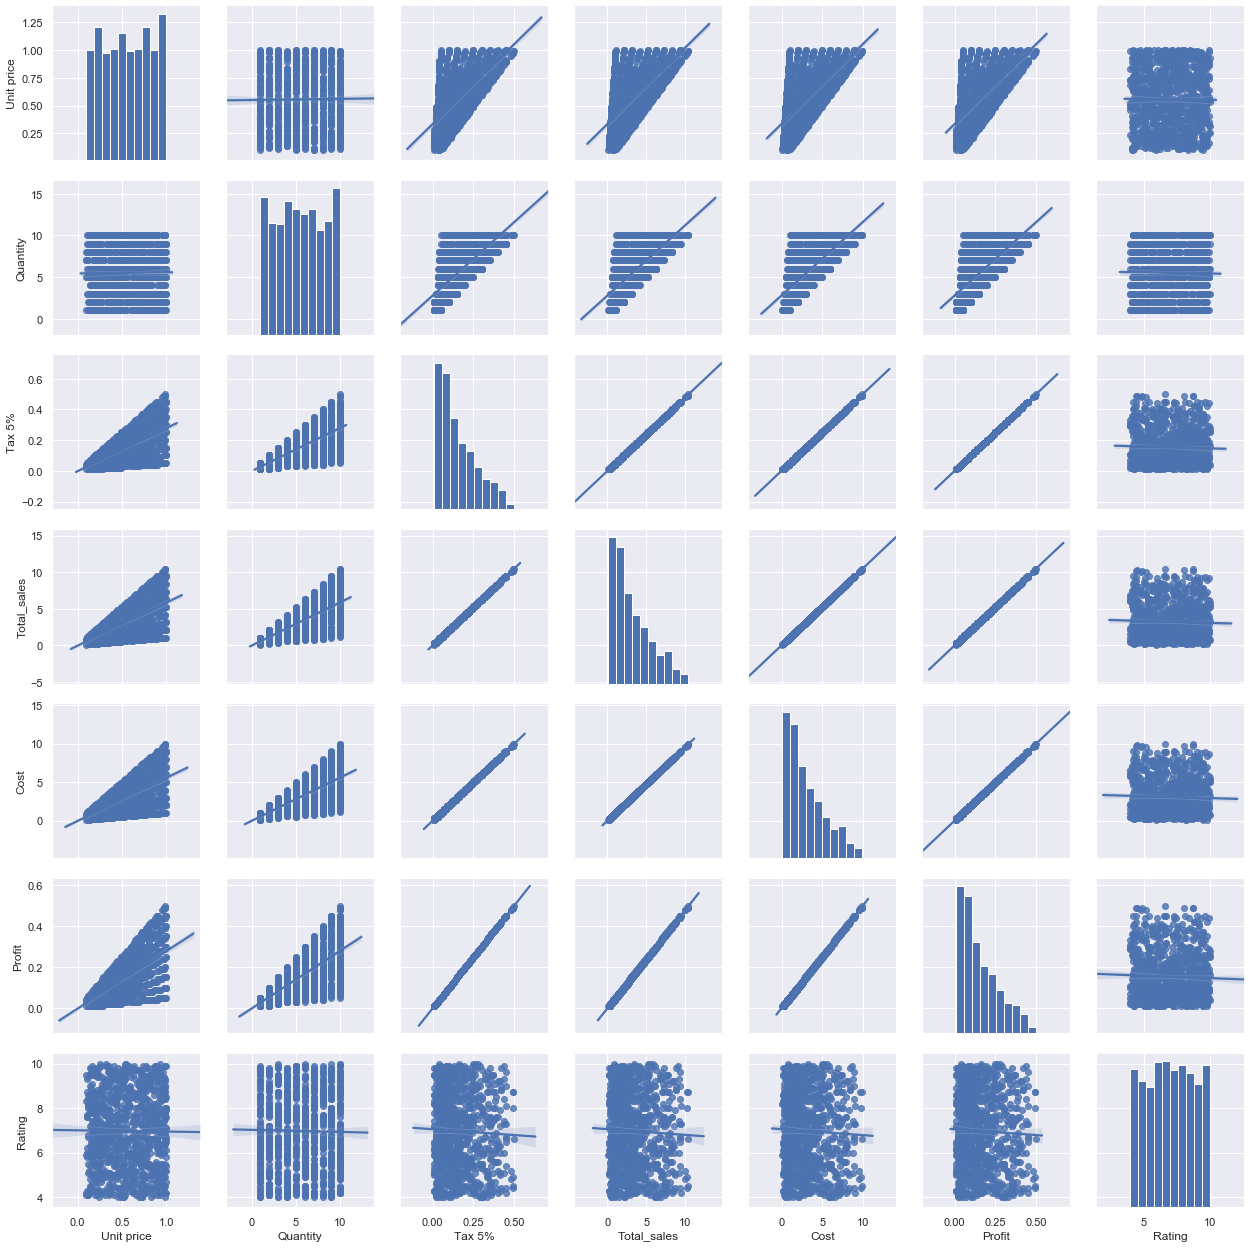

In [119]:
sns.pairplot(main,kind='reg')

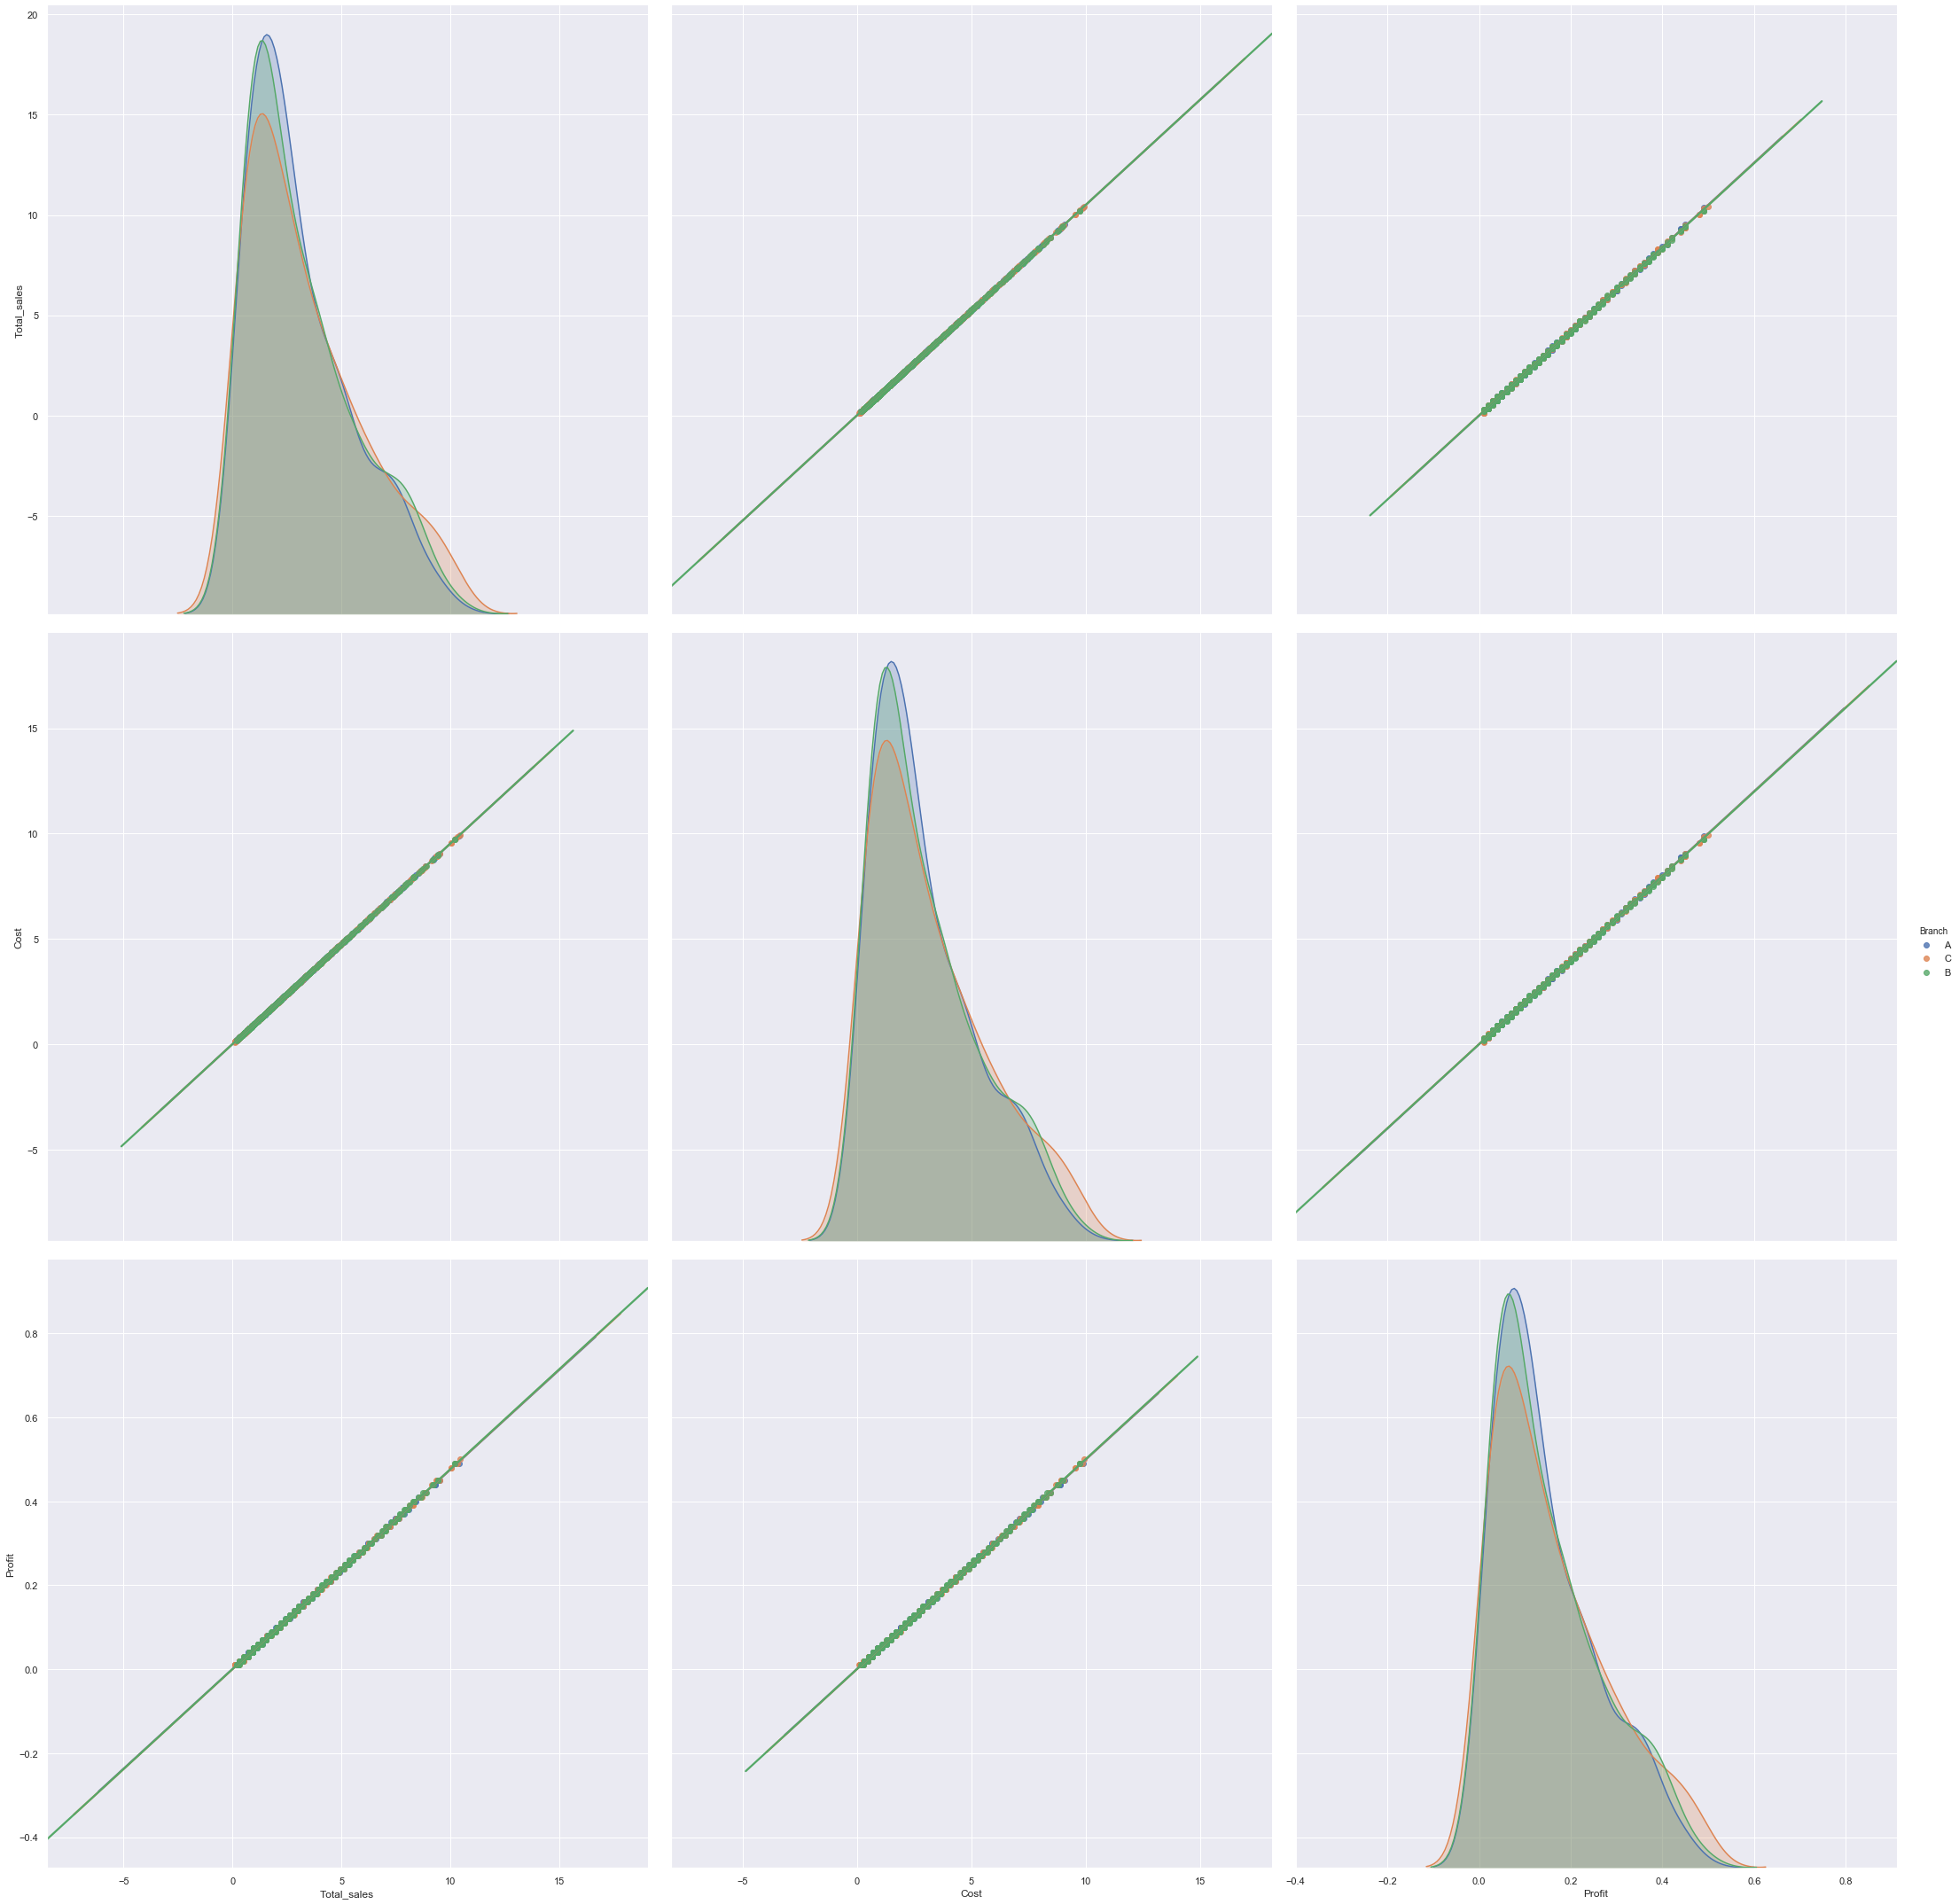

In [122]:
sns.pairplot(main[['Total_sales','Cost','Profit','Branch']],kind='reg',hue='Branch',height= 10)

In [92]:
#preprocessing

In [93]:
main.isnull().sum()

Invoice ID                 0
Branch                     0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total_sales                0
Date                       0
Payment                    0
Cost                       0
gross margin percentage    0
Profit                     0
Rating                     0
dtype: int64

In [104]:

#define a function to investigate the columns  

def see_data(data,limit=6): #seting the function with data,show 6 uniques if available 
    for column in main.columns: #initializing the loop
        print("_________________________________________________________")
        print("Column Name ", column, ': \n', "Uniques: ", data[column].unique()[:limit], "\n",
              " | >>>> Total nulls: ", (round(data[column].isnull().sum() / len(data[column]) * 100,1)),
              " | >>>> Total unique values: ", main.nunique()[column]) #print the data and % of nulls)
        print("_________________________________________________________")

In [105]:
see_data(main)

_________________________________________________________
Column Name  Invoice ID : 
 Uniques:  ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  1000
_________________________________________________________
_________________________________________________________
Column Name  Branch : 
 Uniques:  ['A' 'C' 'B'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  3
_________________________________________________________
_________________________________________________________
Column Name  Customer type : 
 Uniques:  ['Returning' 'New'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  2
_________________________________________________________
_________________________________________________________
Column Name  Gender : 
 Uniques:  ['Female' 'Male'] 
  | >>>> Total nulls:  0.0  | >>>> Total unique values:  2
_________________________________________________________
_______

In [106]:
#No null value in dataset-   gross margin percentage has 1 unique value.

# decision  process to drop some colunms with unique values. They have no impact for our modeling.  
#but 1st we make a copy of our data

In [107]:
from copy import deepcopy

In [108]:
df = deepcopy(main)

In [109]:
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total_sales,Date,Payment,Cost,gross margin percentage,Profit,Rating
0,750-67-8428,A,Returning,Female,STN,0.75,7,0.26,5.49,1/5/2019,Ewallet,5.23,4.761905,0.26,9.1
1,226-31-3081,C,New,Female,STZ,0.15,5,0.04,0.80,3/8/2019,Cash,0.76,4.761905,0.04,9.6
2,631-41-3108,A,New,Male,Esslingen_Zeitung,0.46,7,0.16,3.41,3/3/2019,Credit card,3.24,4.761905,0.16,7.4
3,123-19-1176,A,Returning,Male,STN,0.58,8,0.23,4.89,1/27/2019,Ewallet,4.66,4.761905,0.23,8.4
4,373-73-7910,A,New,Male,Marbacher_Zeitung,0.86,7,0.30,6.34,2/8/2019,Ewallet,6.04,4.761905,0.30,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,New,Male,STN,0.40,1,0.02,0.42,1/29/2019,Ewallet,0.40,4.761905,0.02,6.2
996,303-96-2227,B,New,Female,Esslingen_Zeitung,0.97,10,0.49,10.22,3/2/2019,Ewallet,9.74,4.761905,0.49,4.4
997,727-02-1313,A,Returning,Male,Fellbacher_Zeitung,0.32,1,0.02,0.33,2/9/2019,Cash,0.32,4.761905,0.02,7.7
998,347-56-2442,A,New,Male,Esslingen_Zeitung,0.66,1,0.03,0.69,2/22/2019,Cash,0.66,4.761905,0.03,4.1


In [110]:
#drop column that we done need

In [112]:
main.drop('gross margin percentage',axis=1, inplace= True)

In [113]:
main.head(3)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total_sales,Date,Payment,Cost,Profit,Rating
0,750-67-8428,A,Returning,Female,STN,0.75,7,0.26,5.49,1/5/2019,Ewallet,5.23,0.26,9.1
1,226-31-3081,C,New,Female,STZ,0.15,5,0.04,0.80,3/8/2019,Cash,0.76,0.04,9.6
2,631-41-3108,A,New,Male,Esslingen_Zeitung,0.46,7,0.16,3.41,3/3/2019,Credit card,3.24,0.16,7.4


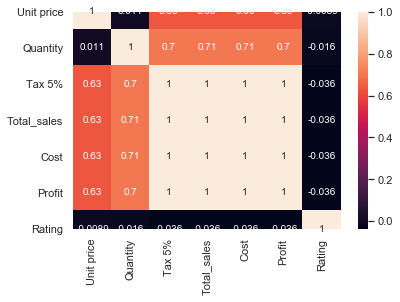

In [127]:
#what influences total_sale in this dataset.  let me use heatmap
#using heatmap to examine the correlation amongs the columns with reference to total_sales
#plt.figure(figsize=(30,20))
sns.heatmap(main.corr(),annot=True)

In [128]:
#Well drop cost,profit,tax - since they are not needed to predict sale. rating- since its a review after sales.
# its makes since that unit price and quatity makes up total sale. 
#For categorical variable - Branch,Customer type,Gender,productline will be included in our model because we already 
#see these variable has an influence on totalsales. Payment method ,invoice ID doesn't matter ,so i will also drop it.

In [131]:
columns_to_drop = ['Invoice ID','Tax 5%','Cost','Profit', 'Tax 5%', 'Payment' ]

In [132]:
main = main.drop(columns_to_drop,axis=1)

In [133]:
main.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total_sales,Date,Rating
0,A,Returning,Female,STN,0.75,7,5.49,1/5/2019,9.1
1,C,New,Female,STZ,0.15,5,0.80,3/8/2019,9.6
2,A,New,Male,Esslingen_Zeitung,0.46,7,3.41,3/3/2019,7.4


In [134]:
main = main.drop('Rating',axis=1)

In [135]:
main.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total_sales,Date
0,A,Returning,Female,STN,0.75,7,5.49,1/5/2019
1,C,New,Female,STZ,0.15,5,0.80,3/8/2019
2,A,New,Male,Esslingen_Zeitung,0.46,7,3.41,3/3/2019


In [136]:
#Feature engineer.
#lets see if sale differ between weekdays.  we break the date in weekday.

In [144]:
main["Date"] = pd.to_datetime(main["Date"])   
main['Weekday'] = main['Date'].dt.day_name()


In [148]:
main.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total_sales,Date,Weekday
0,A,Returning,Female,STN,0.75,7,5.49,2019-01-05,Saturday
1,C,New,Female,STZ,0.15,5,0.80,2019-03-08,Friday
2,A,New,Male,Esslingen_Zeitung,0.46,7,3.41,2019-03-03,Sunday


In [150]:
main['Weekday'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

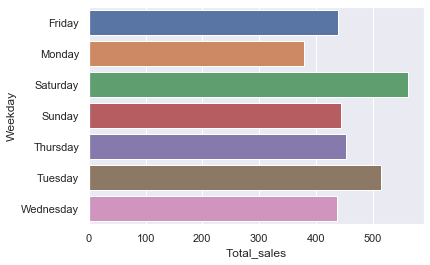

In [168]:
Weekday = main.pivot_table(index='Weekday', values='Total_sales', aggfunc=np.sum).reset_index()
sns.barplot( x="Total_sales", y="Weekday",  data=Weekday)

In [169]:
#Most sale on Saturday and Tuesday . The weekday from our dataset has am impact on the totalsales. i will include in model

In [170]:
#droping the date column
main = main.drop('Date',axis=1)

In [171]:
main.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total_sales,Weekday
0,A,Returning,Female,STN,0.75,7,5.49,Saturday
1,C,New,Female,STZ,0.15,5,0.80,Friday
2,A,New,Male,Esslingen_Zeitung,0.46,7,3.41,Sunday


In [172]:
#preparing data for model - labelling

In [173]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [174]:
cat_col = ['Branch','Customer type','Gender','Product line','Weekday']
le = LabelEncoder() 
for col in cat_col:
    main[col] = le.fit_transform(main[col])
main.head(3)    

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total_sales,Weekday
0,0,1,0,4,0.75,7,5.49,2
1,2,0,0,5,0.15,5,0.80,0
2,0,0,1,0,0.46,7,3.41,3


In [175]:
main.corr()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total_sales,Weekday
Branch,1.000000,0.019608,-0.056318,0.013574,0.027805,0.015964,0.041042,0.050133
Customer type,0.019608,1.000000,-0.039996,-0.042986,0.020332,0.016763,0.019711,0.054156
Gender,-0.056318,-0.039996,1.000000,0.027670,0.016054,-0.074258,-0.049408,0.015110
Product line,0.013574,-0.042986,0.027670,1.000000,-0.023160,0.017971,-0.010378,0.009972
Unit price,0.027805,0.020332,0.016054,-0.023160,1.000000,0.011294,0.634215,-0.026007
Quantity,0.015964,0.016763,-0.074258,0.017971,0.011294,1.000000,0.705493,0.021211
Total_sales,0.041042,0.019711,-0.049408,-0.010378,0.634215,0.705493,1.000000,-0.001990
Weekday,0.050133,0.054156,0.015110,0.009972,-0.026007,0.021211,-0.001990,1.000000


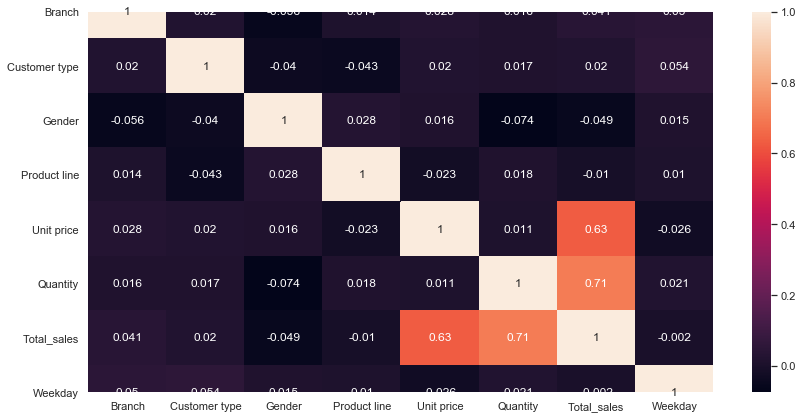

In [179]:
corr = main.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)

In [180]:
#scale my data for modeling

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(main), columns=main.columns)

In [184]:
scaled_data.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total_sales,Weekday
0,-1.208970,0.998002,-0.998002,0.891854,0.729685,0.50993,0.919742,-0.528030
1,1.238338,-1.002002,-0.998002,1.480925,-1.535011,-0.17454,-0.988673,-1.531891
2,-1.208970,-1.002002,1.002002,-1.464431,-0.364918,0.50993,0.073366,-0.026100


In [185]:
#correlation with the the target 
corr[['Total_sales']].sort_values(by='Total_sales',ascending = False)

,Total_sales
Total_sales,1.000000
Quantity,0.705493
Unit price,0.634215
Branch,0.041042
Customer type,0.019711
Weekday,-0.001990
Product line,-0.010378
Gender,-0.049408


In [186]:
#even if weekday,productline and gender has negative relationship, i will like to include them in my model in other to have a 
#more generalizied dataset set. 

In [187]:
#spliting data

In [188]:
x = main.drop('Total_sales', axis=1)
y = main['Total_sales']

In [191]:
x.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Weekday
0,0,1,0,4,0.75,7,2
1,2,0,0,5,0.15,5,0
2,0,0,1,0,0.46,7,3


In [192]:
y.head(3)

0    5.49
1    0.80
2    3.41
Name: Total_sales, dtype: float64

In [193]:
x.shape

(1000, 7)

In [478]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
rmse = lambda true, pred: mse(true, pred) ** 0.5
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [223]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.20, random_state=42)

In [475]:
#I will run a test with 2 models- Linear Regression and Randomforest ,to see which model to use. There are other models 
#but 2 test for now

In [476]:
#1st what is my baseline ?

In [226]:
#define function for evaluation .for RSME AND MAE
def get_error(pred, true):
    print(f'RMSE:       {rmse(true, pred)}')
    print(f'MAE:        {mae(true, pred)}')

In [227]:
#get the baseline for evaluation
get_error(pred = np.array([np.mean(y_train1) for _ in range(len(y_test1))]),
          true = y_test1)

RMSE:       2.5570219238219782
MAE:        2.097263625


In [479]:
# For baseline evaluation
RMSE:       2.5570219238219782
MAE:        2.097263625

In [228]:
#test RF

model = RandomForestRegressor()

trained = model.fit(X_train1, y_train1)

pred = trained.predict(X_test1)

In [229]:
get_error(pred =pred, true = y_test1)

RMSE:       0.10490250235337568
MAE:        0.07065499999999997


In [230]:
#test Linearregression

modelLR = LinearRegression(normalize=True)

trained1 = modelLR.fit(X_train1, y_train1)

pred1 = trained1.predict(X_test1)

In [231]:
get_error(pred =pred1, true = y_test1)

RMSE:       0.7945277517728955
MAE:        0.590992693532533


In [477]:
# straight away i see Random forest is a better model. I will now concentrate on RF -random forest regressor

In [233]:
#scaling
scaler = StandardScaler()
scaled_data1 = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [234]:
scaled_data1

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Weekday
0,-1.208970,0.998002,-0.998002,0.891854,0.729685,0.509930,-0.528030
1,1.238338,-1.002002,-0.998002,1.480925,-1.535011,-0.174540,-1.531891
2,-1.208970,-1.002002,1.002002,-1.464431,-0.364918,0.509930,-0.026100
3,-1.208970,0.998002,1.002002,0.891854,0.088021,0.852165,-0.026100
4,-1.208970,-1.002002,1.002002,0.302783,1.144880,0.509930,-1.531891
...,...,...,...,...,...,...,...
995,1.238338,-1.002002,1.002002,0.891854,-0.591388,-1.543480,0.977760
996,0.014684,-1.002002,-0.998002,-1.464431,1.560074,1.536635,-0.528030
997,-1.208970,0.998002,1.002002,-0.875360,-0.893347,-1.543480,-0.528030
998,-1.208970,-1.002002,1.002002,-1.464431,0.389981,-1.543480,-1.531891


In [480]:
#running model with scaled data 

In [235]:
X_trains, X_test1s, y_train1, y_test1 = train_test_split(scaled_data1,y,test_size=0.20, random_state=42)

In [238]:
modelrdsk = RandomForestRegressor()

trainedrdsk = modelrdsk.fit(X_trains, y_train1)

predrd = trained .predict(X_test1s)

In [239]:
get_error(pred =predrd, true = y_test1)

RMSE:       0.1149781935846968
MAE:        0.07552499999999998


In [244]:
modelLRsd = LinearRegression()

trained1sd = modelLRsd.fit(X_trains, y_train1)

pred1sd = trained1sd.predict(X_test1s)

In [245]:
get_error(pred =pred1sd, true = y_test1)

RMSE:       0.7945277517728956
MAE:        0.5909926935325331


In [483]:
#With scaled data - RF performed better than Linear regression.
#we can also see that there is less error RF test without scaling against RF test with scaled data.
#RF test without scaling  - RMSE: 0.10490250235337568  and         MAE: 0.07065499999999997
#RF test with scaled      - RMSE:  0.1149781935846968  and         MAE: 0.07552499999999998

In [484]:
#Lets see what on prediction looks like with RF test model

In [250]:
pred = trained.predict(x)

In [252]:
df['predicted'] = pred

In [253]:
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total_sales,Date,Payment,Cost,gross margin percentage,Profit,Rating,predicted
0,750-67-8428,A,Returning,Female,STN,0.75,7,0.26,5.49,1/5/2019,Ewallet,5.23,4.761905,0.26,9.1,7.784
1,226-31-3081,C,New,Female,STZ,0.15,5,0.04,0.80,3/8/2019,Cash,0.76,4.761905,0.04,9.6,6.138
2,631-41-3108,A,New,Male,Esslingen_Zeitung,0.46,7,0.16,3.41,3/3/2019,Credit card,3.24,4.761905,0.16,7.4,7.059
3,123-19-1176,A,Returning,Male,STN,0.58,8,0.23,4.89,1/27/2019,Ewallet,4.66,4.761905,0.23,8.4,7.452
4,373-73-7910,A,New,Male,Marbacher_Zeitung,0.86,7,0.30,6.34,2/8/2019,Ewallet,6.04,4.761905,0.30,5.3,8.133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,New,Male,STN,0.40,1,0.02,0.42,1/29/2019,Ewallet,0.40,4.761905,0.02,6.2,5.395
996,303-96-2227,B,New,Female,Esslingen_Zeitung,0.97,10,0.49,10.22,3/2/2019,Ewallet,9.74,4.761905,0.49,4.4,8.432
997,727-02-1313,A,Returning,Male,Fellbacher_Zeitung,0.32,1,0.02,0.33,2/9/2019,Cash,0.32,4.761905,0.02,7.7,5.243
998,347-56-2442,A,New,Male,Esslingen_Zeitung,0.66,1,0.03,0.69,2/22/2019,Cash,0.66,4.761905,0.03,4.1,6.090


In [486]:
# Our RF model is not good at all. 

In [485]:
#test again on only unit price and quantity just to be sure the model can be tuned. I know priceXquality = sales. 
#So my model should close predict close to actual on these 2 variable.

In [255]:
xx = main.drop(['Total_sales','Branch','Customer type','Gender','Product line'], axis=1)
yy = main['Total_sales']

In [257]:
xx.drop('Weekday',axis=1,inplace=True)

In [262]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size=0.30, random_state=42)

In [263]:
#get the baseline for evaluation
get_error(pred = np.array([np.mean(yy_train) for _ in range(len(yy_test))]),
          true = yy_test)

RMSE:       2.5681519464128177
MAE:        2.092995238095238


In [265]:
modelxx = RandomForestRegressor()

trainedxx = modelxx.fit(xx_train, yy_train)

predxx = trainedxx.predict(xx_test)

In [266]:
get_error(pred =predxx, true = yy_test)

RMSE:       0.07431141520795885
MAE:        0.04682907010582011


In [267]:
pred2 = trainedxx.predict(xx)

In [268]:
df['2nd_predicted'] = pred2

In [269]:
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total_sales,Date,Payment,Cost,gross margin percentage,Profit,Rating,predicted,2nd_predicted
0,750-67-8428,A,Returning,Female,STN,0.75,7,0.26,5.49,1/5/2019,Ewallet,5.23,4.761905,0.26,9.1,7.784,5.484067
1,226-31-3081,C,New,Female,STZ,0.15,5,0.04,0.80,3/8/2019,Cash,0.76,4.761905,0.04,9.6,6.138,0.785300
2,631-41-3108,A,New,Male,Esslingen_Zeitung,0.46,7,0.16,3.41,3/3/2019,Credit card,3.24,4.761905,0.16,7.4,7.059,3.253667
3,123-19-1176,A,Returning,Male,STN,0.58,8,0.23,4.89,1/27/2019,Ewallet,4.66,4.761905,0.23,8.4,7.452,4.838000
4,373-73-7910,A,New,Male,Marbacher_Zeitung,0.86,7,0.30,6.34,2/8/2019,Ewallet,6.04,4.761905,0.30,5.3,8.133,6.336833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,New,Male,STN,0.40,1,0.02,0.42,1/29/2019,Ewallet,0.40,4.761905,0.02,6.2,5.395,0.415000
996,303-96-2227,B,New,Female,Esslingen_Zeitung,0.97,10,0.49,10.22,3/2/2019,Ewallet,9.74,4.761905,0.49,4.4,8.432,10.197467
997,727-02-1313,A,Returning,Male,Fellbacher_Zeitung,0.32,1,0.02,0.33,2/9/2019,Cash,0.32,4.761905,0.02,7.7,5.243,0.327000
998,347-56-2442,A,New,Male,Esslingen_Zeitung,0.66,1,0.03,0.69,2/22/2019,Cash,0.66,4.761905,0.03,4.1,6.090,0.710750


In [270]:
#2 features , unit price and quantity, my random forest performed very well.Comfirming  the model is good. 
#Now i return to 1st result on  7 initial features. I will try tuning the parameters

In [271]:
# Create the random grid
random_grid = {
    'n_estimators': [500,550,600],
    'max_features': [ 'auto','sqrt'],
    'max_depth': [8,9,10],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2],
    'bootstrap': [True],
}

# calculate number of possible parameter combinations
for i, n in enumerate([len(v) for v in random_grid.values()]):
    if i+1 == 1: m = n
    else: m *= n
print(f'Number of Combinations: {m}')

Number of Combinations: 108


In [272]:
# use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid,
                               n_iter =80, # search across n combinations
                               cv = 5,        # n fold cross validation
                               verbose = 2,
                               n_jobs = -1)

# Fit the random search model on  datatset
rf_random.fit(X_train1, y_train1)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [277]:
   tuned = {'n_estimators': 500,
            'min_samples_split': 3,
            'min_samples_leaf': 2,
            'max_features': 'auto',
            'max_depth': 10,
            'bootstrap': True}

In [278]:
model1t = RandomForestRegressor(**tuned)

trained1t = model1t.fit(X_train1, y_train1)

pred1t = trained1t.predict(X_test1)

In [279]:
get_error(pred =pred1t, true = y_test1)

RMSE:       0.10151221989783725
MAE:        0.06403347838008384


In [280]:
#reduced alittle---- more tuning

In [281]:
param_grid = {
    'n_estimators': [450,470,490,500],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,3,4],
    'max_features': ['auto'],
    'max_depth': [10,12,14],
    'bootstrap': [True],
}
# calculate number of possible parameter combinations
for i, n in enumerate([len(v) for v in param_grid.values()]):
    if i+1 == 1: m = n
    else: m *= n
print(f'Number of Combinations: {m}')

Number of Combinations: 108


In [284]:
# init new rf instance
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train1, y_train1)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth'

In [285]:
   tuned2 = {'bootstrap': True,
             'max_depth': 14,
             'max_features': 'auto',
             'min_samples_leaf': 4,
             'min_samples_split': 5,
             'n_estimators': 500}

In [286]:
model2t = RandomForestRegressor(**tuned2)

trained2t = model2t.fit(X_train1, y_train1)

pred2t = trained2t.predict(X_test1)

In [287]:
get_error(pred =pred2t, true = y_test1)

RMSE:       0.13796908184960233
MAE:        0.09144550006949162


In [288]:
#Worse result. i discard and return to 1st tuned

In [289]:
   tuned3 = {'n_estimators': 510,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            'max_features': 'auto',
            'max_depth': 9,
            'bootstrap': True}

In [291]:
model3t = RandomForestRegressor(**tuned3)

trained3t = model3t.fit(X_train1, y_train1)

pred3t = trained3t.predict(X_test1)

In [292]:
get_error(pred =pred3t, true = y_test1)

RMSE:       0.09256682554144363
MAE:        0.059010633296384715


In [491]:
# tuned3 is even better-

In [293]:
   tuned4 = {'n_estimators': 520,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            'max_features': 'auto',
            'max_depth': 8,
            'bootstrap': True}

In [294]:
model4t = RandomForestRegressor(**tuned4)

trained4t = model4t.fit(X_train1, y_train1)

pred4t = trained4t.predict(X_test1)

In [295]:
get_error(pred =pred4t, true = y_test1)

RMSE:       0.09909002033460775
MAE:        0.06287628618952353


In [487]:
#Tuned3 is still better.
#After sereval parameter tuning. tuned6 (below)is the best .


In [446]:
   tuned6 ={'n_estimators': 310,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            'max_features': 'auto',
            'max_depth': 11,
            'bootstrap': True}

In [447]:
model6t = RandomForestRegressor(**tuned6)

trained6t = model6t.fit(X_train1, y_train1)

pred6t = trained6t.predict(X_test1)

In [448]:
get_error(pred =pred6t, true = y_test1)

RMSE:       0.09100155358614105
MAE:        0.0570630429147472


In [449]:
predxxx = trained6t.predict(x)

In [450]:
df['3predicted'] = predxxx

In [451]:
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total_sales,Date,Payment,Cost,gross margin percentage,Profit,Rating,predicted,2nd_predicted,3predicted
0,750-67-8428,A,Returning,Female,STN,0.75,7,0.26,5.49,1/5/2019,Ewallet,5.23,4.761905,0.26,9.1,7.784,5.484067,5.468677
1,226-31-3081,C,New,Female,STZ,0.15,5,0.04,0.80,3/8/2019,Cash,0.76,4.761905,0.04,9.6,6.138,0.785300,0.771601
2,631-41-3108,A,New,Male,Esslingen_Zeitung,0.46,7,0.16,3.41,3/3/2019,Credit card,3.24,4.761905,0.16,7.4,7.059,3.253667,3.395793
3,123-19-1176,A,Returning,Male,STN,0.58,8,0.23,4.89,1/27/2019,Ewallet,4.66,4.761905,0.23,8.4,7.452,4.838000,4.802645
4,373-73-7910,A,New,Male,Marbacher_Zeitung,0.86,7,0.30,6.34,2/8/2019,Ewallet,6.04,4.761905,0.30,5.3,8.133,6.336833,6.343855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,New,Male,STN,0.40,1,0.02,0.42,1/29/2019,Ewallet,0.40,4.761905,0.02,6.2,5.395,0.415000,0.407424
996,303-96-2227,B,New,Female,Esslingen_Zeitung,0.97,10,0.49,10.22,3/2/2019,Ewallet,9.74,4.761905,0.49,4.4,8.432,10.197467,10.218191
997,727-02-1313,A,Returning,Male,Fellbacher_Zeitung,0.32,1,0.02,0.33,2/9/2019,Cash,0.32,4.761905,0.02,7.7,5.243,0.327000,0.329452
998,347-56-2442,A,New,Male,Esslingen_Zeitung,0.66,1,0.03,0.69,2/22/2019,Cash,0.66,4.761905,0.03,4.1,6.090,0.710750,0.708452


In [488]:
# The model(model6t) provide the '3predicted' column on the dataframe. and had 7 variables in the model.
# '2nd_predicted' was result from only unit price and quatity.
# 'predicted' was the initial result on 7 variables (before i tuned the parameters)
#Comparing 'predicted' and '3predicted'- we see a great improvement . Tuning works!

In [489]:
#graphical comparism of Total_sale and the '3predicted'.

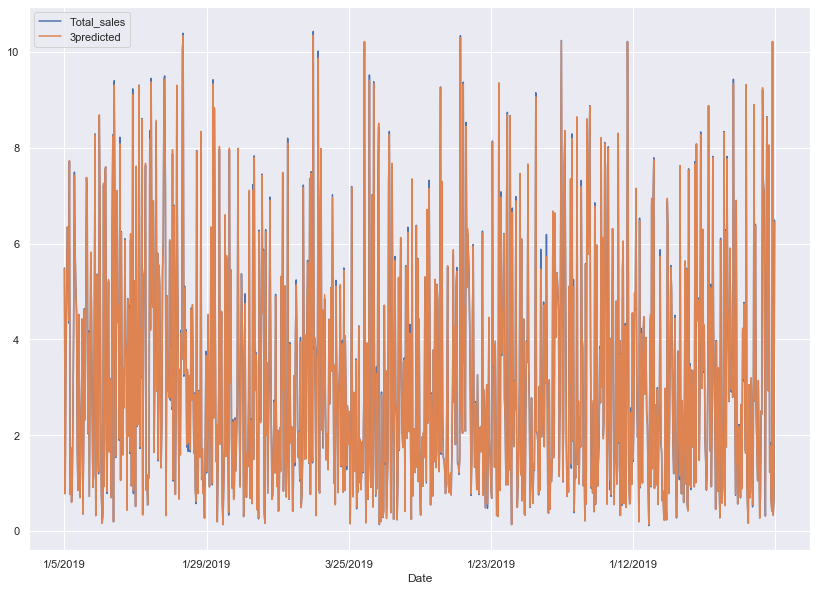

In [459]:

df.plot(x="Date", y=["Total_sales",'3predicted'])
plt.show()

In [490]:
#Nicely represented and quite close to the actual.

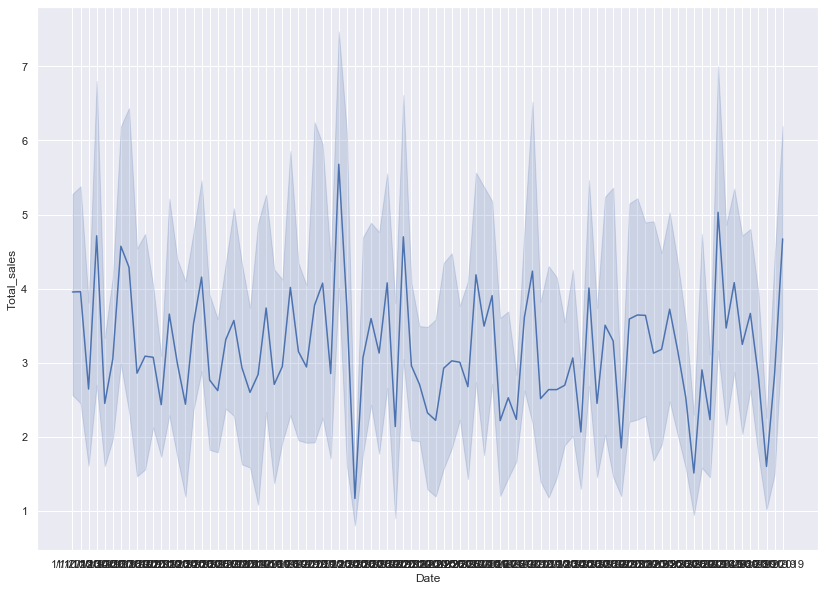

In [465]:
sns.lineplot(x='Date',y='Total_sales',data=df)

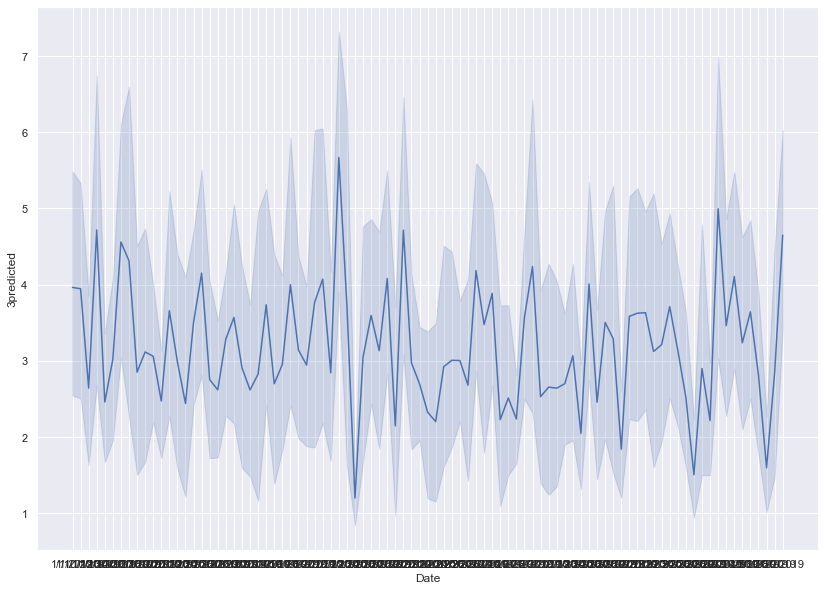

In [469]:
sns.lineplot(x='Date',y='3predicted',data=df)

 Final script for my running the model. 

In [ ]:
#Load dataset.
dataset = pd.read_csv('C:/Users/chris/Desktop/Stzwsale1.csv',sep='\t')

dataset.drop('Unnamed: 0',axis=1,inplace=True)

#copying dataset
Original = deepcopy(dataset)

# ADDITINAL PROCESSING - 

#A little Feature engineering
dataset["Date"] = pd.to_datetime(dataset["Date"])   
dataset['Weekday'] = dataset['Date'].dt.day_name()

#drop columns not need (I have already done EDA,clean and some Preprocess outside this IDE)
dataset.drop(['Invoice ID','Tax 5%','Date','Payment','Cost','gross margin percentage','Profit','Rating'],axis=1,inplace=True)



#copying final model dataset
ForModel = deepcopy(dataset)

#preparing data for model - labelling

cat_col = ['Branch','Customer type','Gender','Product line','Weekday']
le = LabelEncoder() 
for col in cat_col:
    dataset[col] = le.fit_transform(dataset[col])
    
#spliting data
x = dataset.drop('Total_sales', axis=1)
y = dataset['Total_sales']


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

# Run model with my best tuning parameter

tuned  =   {'n_estimators': 310,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            'max_features': 'auto',
            'max_depth': 11,
            'bootstrap': True}

model = RandomForestRegressor(**tuned)

trained = model.fit(X_train, y_train)

pred = trained.predict(X_test)

#model predict the result

pred = trained.predict(x)

#Load back to dataset to original
Original['predicted'] = pred